# Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install tensorflow scikit-learn seaborn matplotlib numpy pandas opencv-python -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

# Load the data
images = np.load('/content/drive/My Drive/PG_AIML/Colab_Notebooks/images.npy')
labels = pd.read_csv('/content/drive/My Drive/PG_AIML/Colab_Notebooks/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [5]:
#shape of the Image dataset

images.shape

(4750, 128, 128, 3)

In [6]:
#shape of the labels dataset

labels.shape

(4750, 1)

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [7]:
# Function to display all categories of plant images

def plot_images(images,labels):
  num_classes=10
  categories=np.unique(labels)
  keys=dict(labels['Label'])
  rows = 3
  cols = 4
  fig = plt.figure(figsize=(12, 8))
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)
          ax.imshow(images[random_index, :])
          ax.set_title(keys[random_index])
  plt.show()

Below image plot shows how each plants are distinct. Most of them have distinct features, however having a bigger dataset can help train a better model.

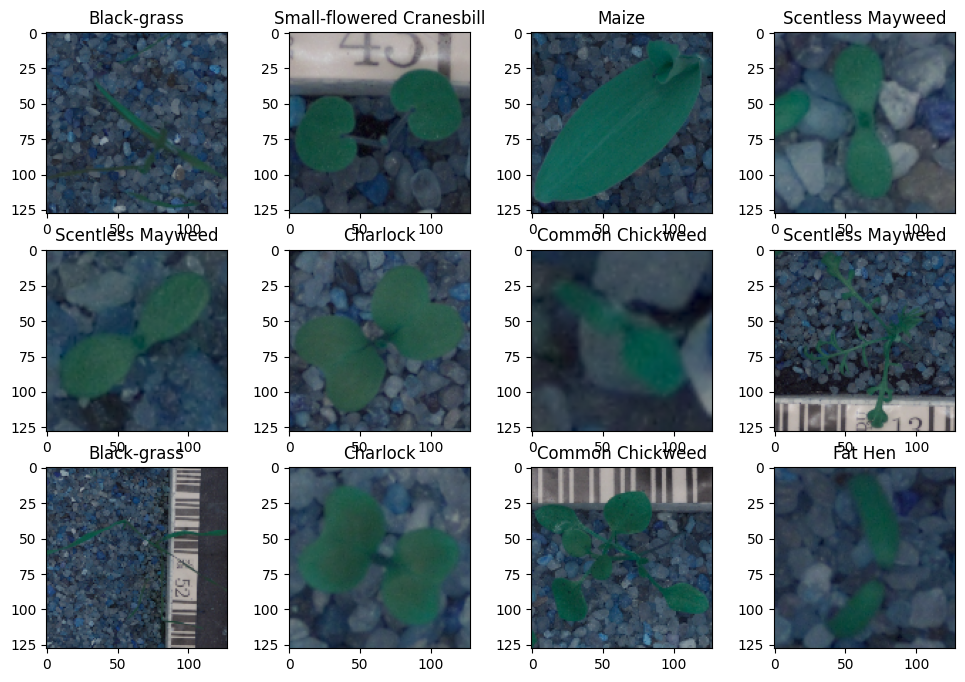

In [8]:
plot_images(images,labels)

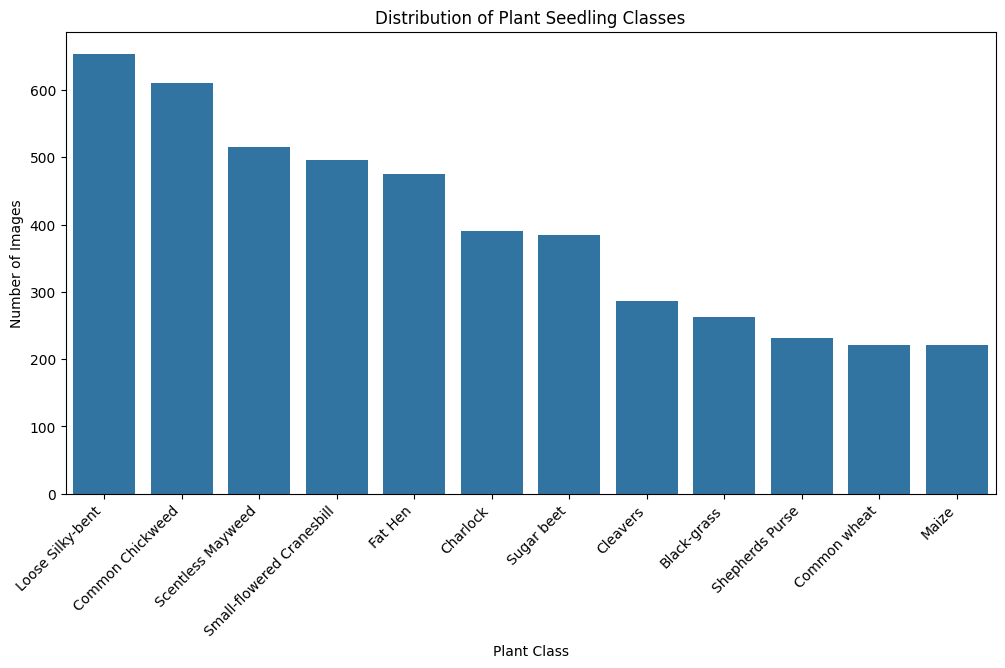

In [9]:


#checking for data imbalance
label_counts = labels['Label'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x = label_counts.index, y = label_counts.values)
plt.title('Distribution of Plant Seedling Classes')
plt.xlabel('Plant Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.show()

From the above barplot, it looks like the dataset is imbalanced. Few classifications are represented more compared to few which have limited test data. Eg: Loose silky bent has more data compared to Maize.

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700')])

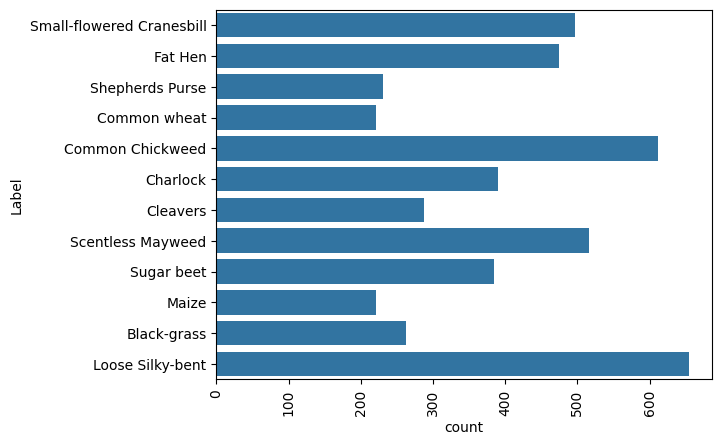

In [10]:
sns.countplot(y=labels['Label'])
plt.xticks(rotation='vertical')

array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]], dtype=uint8)
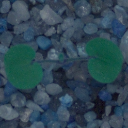

In [11]:
images[0]

In [12]:
print(labels['Label'][0])


Small-flowered Cranesbill


## Data Pre-Processing

### Convert the BGR images to RGB images.

In [13]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)


### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [14]:
images_decreased=[]
height = 64
width =  64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

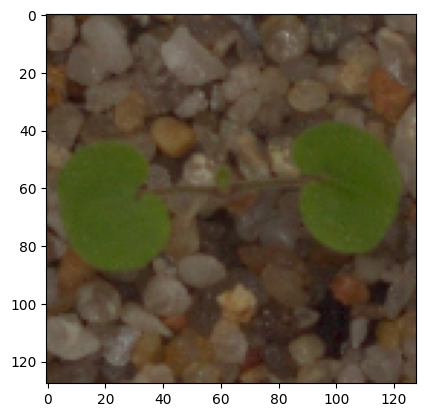

In [15]:
#comparing the original image size and the reduced size

plt.imshow(images[0])

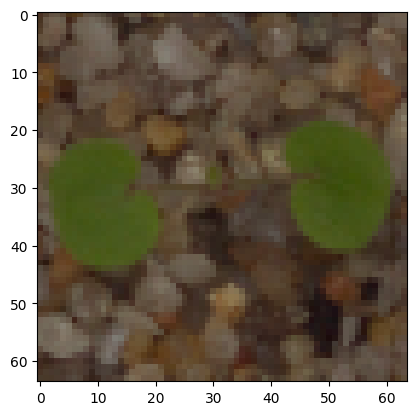

In [16]:
plt.imshow(images_decreased[0])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [17]:
from sklearn.model_selection import train_test_split # Import train_test_split for splitting data

# Convert the list of images to a numpy array
images_decreased = np.array(images_decreased) # Convert list to numpy array for easier handling

# Extract labels from the dataframe
labels_encoded = labels['Label'].values # Extract the labels from dataframe as numpy array

# Split the data into training, testing, and validation sets
# First, split into training and a combined test+validation set (80% train, 20% test+val)
X_train, X_test_val, y_train, y_test_val = train_test_split(images_decreased, labels_encoded, test_size=0.2, random_state=42)

# Then, split the combined test+validation set into test and validation (50% test, 50% validation)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

In [18]:

print(f"Training data shape: {X_train.shape}") # print the shape of the training data
print(f"Test data shape: {X_test.shape}") # print the shape of the test data
print(f"Validation data shape: {X_val.shape}") # print the shape of the validation data

Training data shape: (3800, 64, 64, 3)
Test data shape: (475, 64, 64, 3)
Validation data shape: (475, 64, 64, 3)


In [19]:
# Display image pixel value range

print(f"Pixel value range of training images: {X_train.min()} to {X_train.max()}")
print(f"Pixel value range of training images: {X_test.min()} to {X_test.max()}")
print(f"Pixel value range of training images: {X_val.min()} to {X_val.max()}")


Pixel value range of training images: 0 to 255
Pixel value range of training images: 0 to 255
Pixel value range of training images: 0 to 255


### Encode the target labels

In [20]:
from sklearn.preprocessing import LabelBinarizer

# Initialize LabelBinarizer
en = LabelBinarizer()

# Fit and transform the training labels
y_train_encoded = en.fit_transform(y_train)

# Transform the test and validation labels
y_test_encoded = en.transform(y_test)
y_val_encoded = en.transform(y_val)

print("Shape of encoded training labels:", y_train_encoded.shape)
print("Shape of encoded test labels:", y_test_encoded.shape)
print("Shape of encoded validation labels:", y_val_encoded.shape)

Shape of encoded training labels: (3800, 12)
Shape of encoded test labels: (475, 12)
Shape of encoded validation labels: (475, 12)


### Data Normalization

In [21]:

# Normalize the image pixels of train, test and validation data to stay within the range of 0 and 1
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [22]:
# Display image pixel value range

print(f"Pixel value range of training images: {X_train_normalized.min()} to {X_train_normalized.max()}")
print(f"Pixel value range of training images: {X_val_normalized.min()} to {X_val_normalized.max()}")
print(f"Pixel value range of training images: {X_test_normalized.min()} to {X_test_normalized.max()}")


Pixel value range of training images: 0.0 to 1.0
Pixel value range of training images: 0.0 to 1.0
Pixel value range of training images: 0.0 to 1.0


## Model Building

In [23]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model1 = Sequential([
    # Convolutional layer with 128 filters, 3x3 kernel, ReLU activation, and input shape
    Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 3)),

    # Max pooling layer with 2x2 pool size
    MaxPooling2D((2, 2)),

    # Convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
    Conv2D(64, (3, 3), activation='relu'),

    # Max pooling layer with 2x2 pool size
    MaxPooling2D((2, 2)),


    # Convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
    Conv2D(32, (3, 3), activation='relu'),

    # Max pooling layer with 2x2 pool size
    MaxPooling2D((2, 2)),


    # Flatten layer to convert the 3D feature maps to a 1D vector
    Flatten(),


    # Fully connected (Dense) layer with 16 neurons units and ReLU activation
    Dense(16, activation='relu'),

    # Dropout layer to reduce overfitting
    Dropout(0.3),


    # Output layer with 12 neurons in output layer.
    Dense(12, activation='softmax')
])

# Compile the model with Adam optimizer, categorical crossentropy loss and accuracy metric
model1.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          18,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114,492 (447.23 KB)

 Trainable params: 114,492 (447.23 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Fit the model on training data, using validation data for validation
history_1 = model1.fit(X_train_normalized, y_train_encoded,
                    epochs=30,
                    validation_data=(X_val_normalized, y_val_encoded),
                    batch_size = 32,
                    verbose=2
                    )


Epoch 1/30
119/119 - 21s - 173ms/step - accuracy: 0.1058 - loss: 2.4649 - val_accuracy: 0.1432 - val_loss: 2.4403
Epoch 2/30
119/119 - 1s - 9ms/step - accuracy: 0.1339 - loss: 2.4328 - val_accuracy: 0.1832 - val_loss: 2.4060
Epoch 3/30
119/119 - 1s - 11ms/step - accuracy: 0.1934 - loss: 2.3474 - val_accuracy: 0.2084 - val_loss: 2.2251
Epoch 4/30
119/119 - 1s - 11ms/step - accuracy: 0.2697 - loss: 2.1514 - val_accuracy: 0.4147 - val_loss: 1.8712
Epoch 5/30
119/119 - 1s - 9ms/step - accuracy: 0.3379 - loss: 1.9224 - val_accuracy: 0.4063 - val_loss: 1.7209
Epoch 6/30
119/119 - 1s - 11ms/step - accuracy: 0.3537 - loss: 1.8378 - val_accuracy: 0.4674 - val_loss: 1.6328
Epoch 7/30
119/119 - 1s - 11ms/step - accuracy: 0.3724 - loss: 1.7624 - val_accuracy: 0.4716 - val_loss: 1.5525
Epoch 8/30
119/119 - 1s - 11ms/step - accuracy: 0.3721 - loss: 1.7465 - val_accuracy: 0.4884 - val_loss: 1.5056
Epoch 9/30
119/119 - 1s - 11ms/step - accuracy: 0.3897 - loss: 1.6692 - val_accuracy: 0.5095 - val_loss:

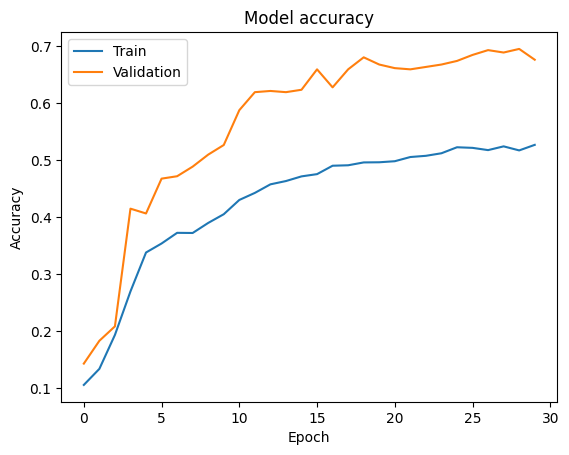

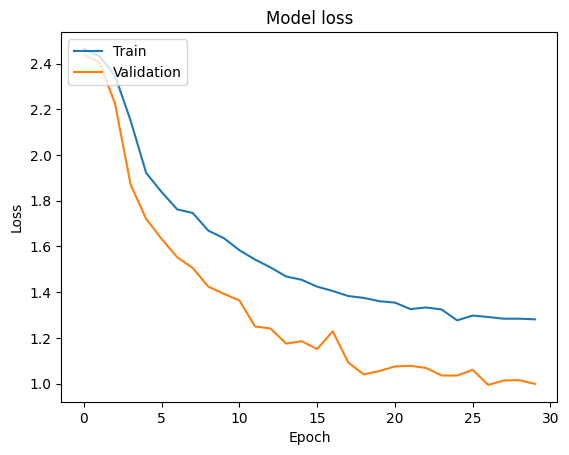

In [25]:

# Plot training accuracy values
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training loss values
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [26]:
# Evaluate the model on the test data
loss, accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 1.1756
Test Accuracy: 0.6295


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


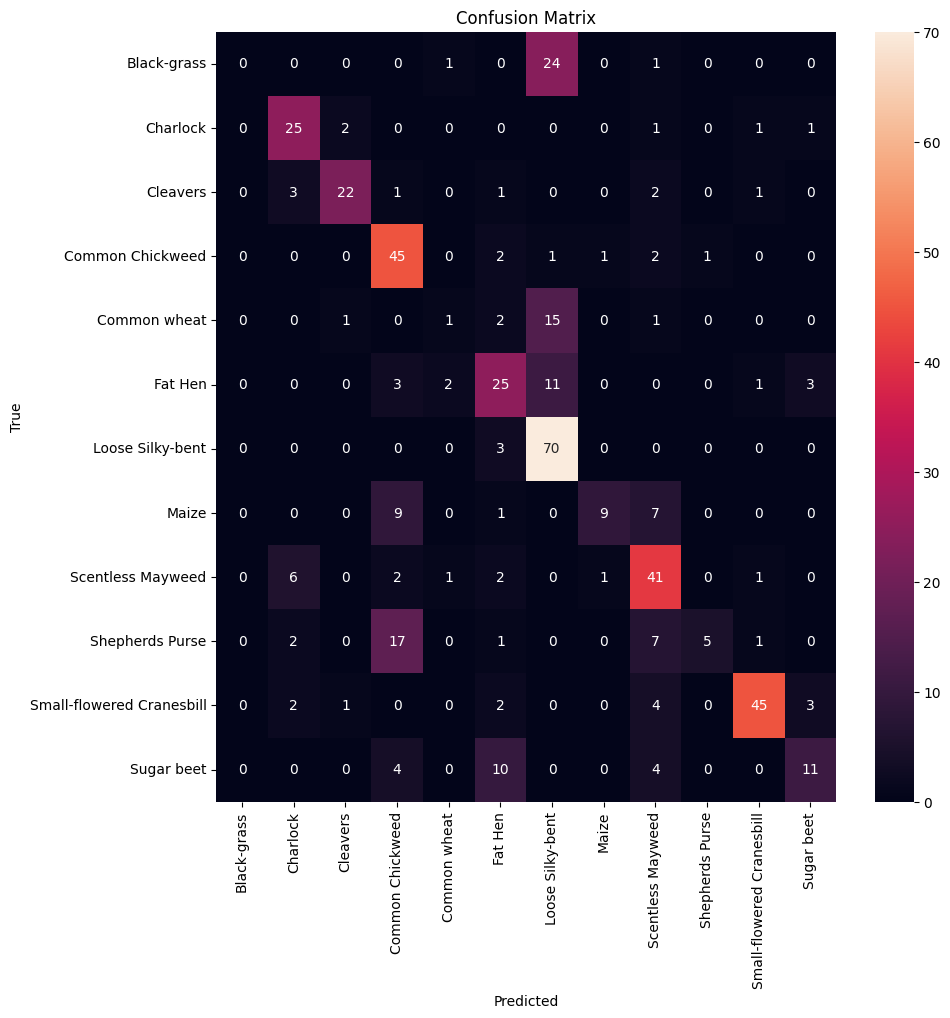

In [27]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model1.predict(X_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=en.classes_, yticklabels=en.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [28]:
# Plotting the classification report

from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_true, y_pred_classes, target_names=en.classes_)

# Print the report
print(report)




                           precision    recall  f1-score   support

              Black-grass       0.00      0.00      0.00        26
                 Charlock       0.66      0.83      0.74        30
                 Cleavers       0.85      0.73      0.79        30
         Common Chickweed       0.56      0.87      0.68        52
             Common wheat       0.20      0.05      0.08        20
                  Fat Hen       0.51      0.56      0.53        45
         Loose Silky-bent       0.58      0.96      0.72        73
                    Maize       0.82      0.35      0.49        26
        Scentless Mayweed       0.59      0.76      0.66        54
          Shepherds Purse       0.83      0.15      0.26        33
Small-flowered Cranesbill       0.90      0.79      0.84        57
               Sugar beet       0.61      0.38      0.47        29

                 accuracy                           0.63       475
                macro avg       0.59      0.54      0.52    

The model is giving about 63% accuracy on the test data which is comparable to the accuracy of the validation data. This implies that the model is giving a generalized performance.

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [29]:

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [30]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [31]:
# Complete the code to set the rotation_range to 20
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )


# Fit the data generator on your training data
train_datagen.fit(X_train_normalized)

In [32]:
# Intializing a sequential model
model2 = Sequential()

# Complete the code to add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Complete the code to add max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))


model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Complete the code to add dropout with dropout_rate=0.3
model2.add(Dropout(0.3))
# Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Complete the code to initialize Adam Optimimzer
opt=Adam()
# Complete the code to Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │         131,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,676 (592.48 KB)

 Trainable params: 151,612 (592.23 KB)

 Non-trainable params: 64 (256.00 B)

In [33]:

epochs = 30

batch_size = 32

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - accuracy: 0.1843 - loss: 2.3608 - val_accuracy: 0.1895 - val_loss: 2.3723 - learning_rate: 0.0010
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.3750 - loss: 1.9210 - val_accuracy: 0.1937 - val_loss: 2.3753 - learning_rate: 0.0010
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.4125 - loss: 1.7581 - val_accuracy: 0.1305 - val_loss: 2.4256 - learning_rate: 0.0010
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.4062 - loss: 1.7814 - val_accuracy: 0.1263 - val_loss: 2.4427 - learning_rate: 0.0010
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.4936 - loss: 1.5147 - val_accuracy: 0.2295 - val_loss: 2.1350 - learning_rate: 0.0010
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.6250 - loss: 1.1312 - val_accuracy: 0.2653 - val_loss: 2.0993 - learning_rate: 0.0010
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.5235 - lo

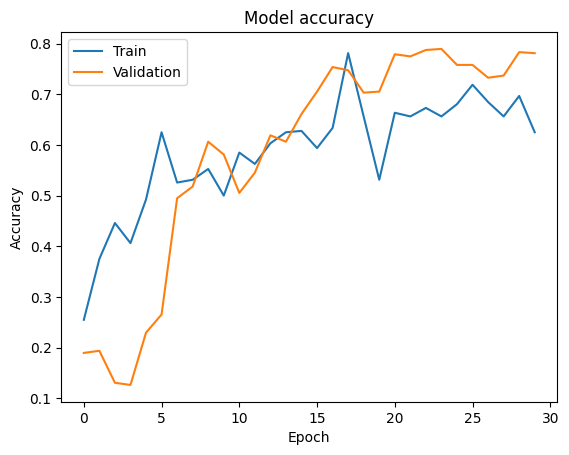

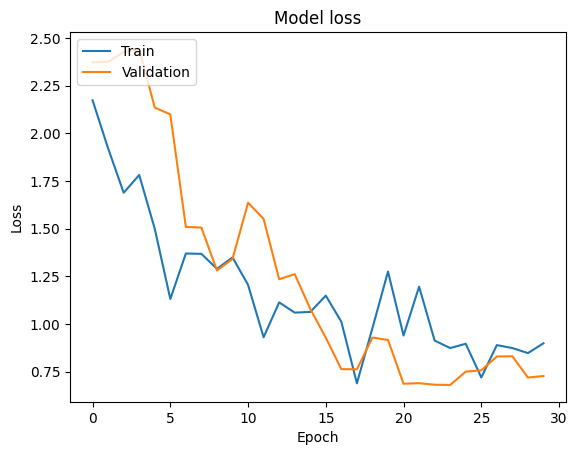

In [34]:

# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
# Evaluate the model on the test data
loss, accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.8654
Test Accuracy: 0.7326


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


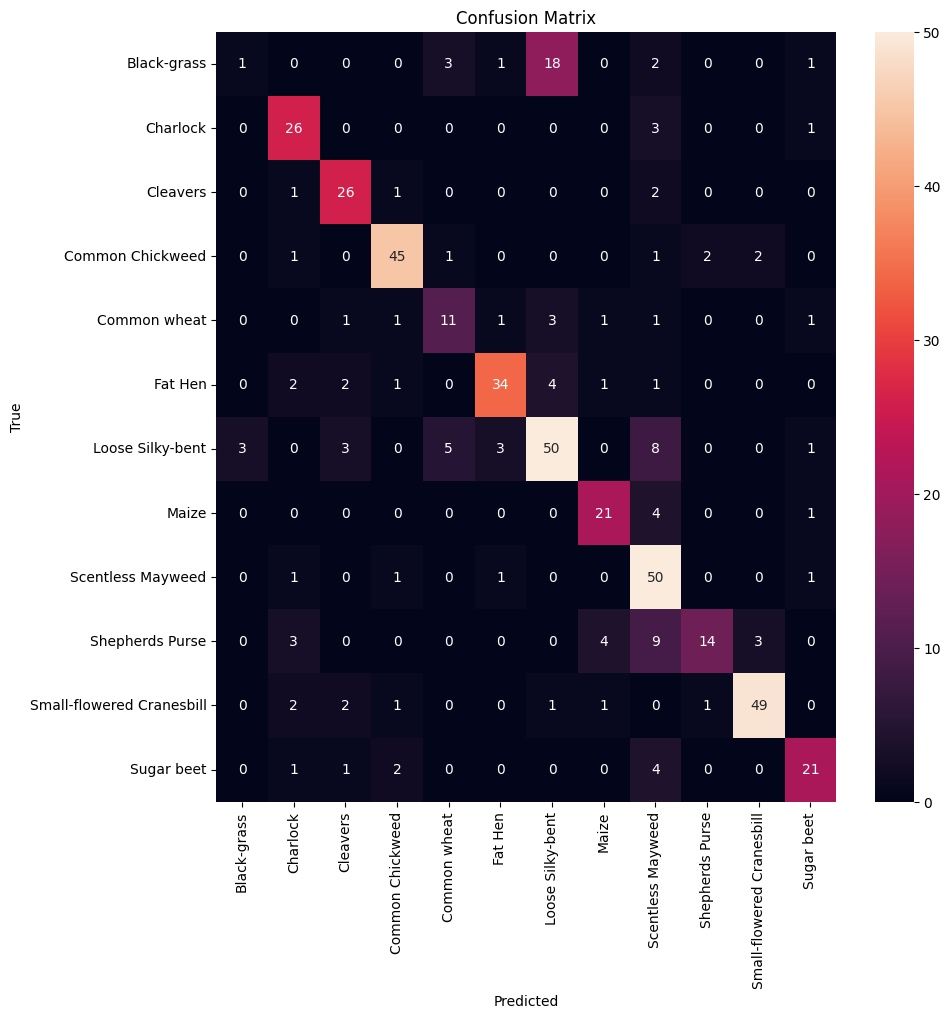

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model2.predict(X_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d",color="white",
            xticklabels=en.classes_, yticklabels=en.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [37]:

from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_true, y_pred_classes, target_names=en.classes_)

# Print the report
print(report)

                           precision    recall  f1-score   support

              Black-grass       0.25      0.04      0.07        26
                 Charlock       0.70      0.87      0.78        30
                 Cleavers       0.74      0.87      0.80        30
         Common Chickweed       0.87      0.87      0.87        52
             Common wheat       0.55      0.55      0.55        20
                  Fat Hen       0.85      0.76      0.80        45
         Loose Silky-bent       0.66      0.68      0.67        73
                    Maize       0.75      0.81      0.78        26
        Scentless Mayweed       0.59      0.93      0.72        54
          Shepherds Purse       0.82      0.42      0.56        33
Small-flowered Cranesbill       0.91      0.86      0.88        57
               Sugar beet       0.78      0.72      0.75        29

                 accuracy                           0.73       475
                macro avg       0.71      0.70      0.68    

Observations: We can see that our training accuracy is 73% and our Test Accuracy is 72%. The second model with dropout layers seems to have reduced the overfitting as compared to the previous model. The validation and test accuracy have increased slightly as compared to the previous model.

## Final Model

In [42]:
# Evaluate both models and compare their performance metrics.

model1_test_accuracy = 0.6295
model2_test_accuracy = 0.7326

if model1_test_accuracy > model2_test_accuracy:
    best_model = model1
    reason = "Model1 achieved a higher test accuracy."
elif model2_test_accuracy > model1_test_accuracy:
    best_model = model2
    reason = "Model2 achieved a higher test accuracy."

print(f"The best model is: {best_model.name if hasattr(best_model, 'name') else 'Model'}\nReason: {reason}")


The best model is: sequential
Reason: Model2 achieved a higher test accuracy.


Based on the comparison between accuracy value of both the models, Model2 has a better accuracy and efficiency.

The Final model selected is the one with

* 64 Convoluted layer
* 32 convoluted layer
* 16 Dense layer
* 30% dropout layer
* Adam optimised
* Data augmentation
* Learning rate reduction


### Visualizing the prediction

Visualizing the performance of Model2

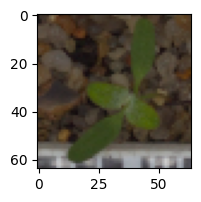

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Label ['Scentless Mayweed']
True Label Fat Hen


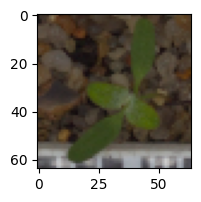

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Label ['Scentless Mayweed']
True Label Fat Hen


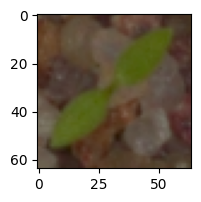

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


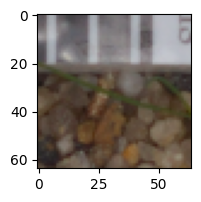

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Label ['Loose Silky-bent']
True Label Loose Silky-bent


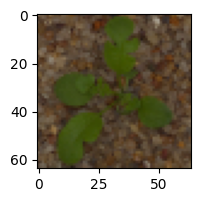

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Label ['Maize']
True Label Shepherds Purse


In [44]:

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', en.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', en.inverse_transform(y_test_encoded)[2])


# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', en.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', en.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', en.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', en.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', en.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', en.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', en.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', en.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Actionable Insights and Business Recommendations



Based on the build model, here are some actionable insights and business recommendations:

**1. Data Imbalance:**

* **Insight:** The code checks for data imbalance using bar plots.  A significant imbalance in the number of images per plant class will likely impact model performance. Some classes might be over-represented, leading the model to perform well on those, while underperforming on others.
* If imbalance is detected:
  * **Resampling:** Oversampling the minority classes or undersampling the majority classes can be an option. Techniques like SMOTE can generate synthetic samples.
  * **Class Weights:**  Adjust class weights during model training to penalize misclassifications of minority classes more heavily.

**2. Model Performance:**

* Two models (model1 and model2) are trained and evaluated.  Model2, incorporating data augmentation and learning rate reduction, achieves a higher test accuracy (0.7326 vs. 0.6295). The confusion matrix and classification report provide a detailed breakdown of model performance for each class.


We explored two different versions of the CNN model and developed an understanding of how to enhance it by adjusting various hyperparameters and applying different techniques.

There remains significant room for improvement, and tuning different hyperparameters can further boost the model's performance.